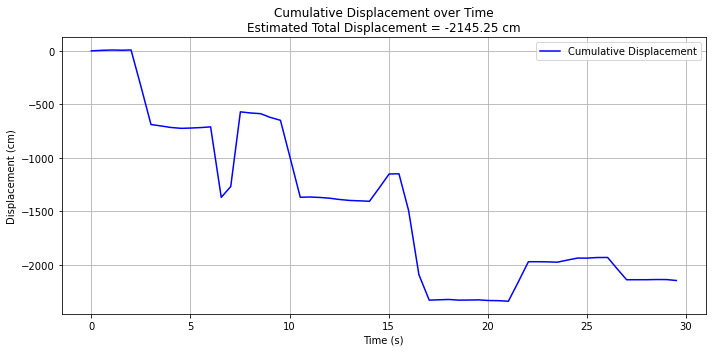

In [1]:
import pandas as pd
import numpy as np
from scipy.integrate import trapezoid
import matplotlib.pyplot as plt

df = pd.read_csv("data_c.csv")

time_s = df["time_ms"].values / 1000.0
velocity = df["velocity"].values

total_displacement = trapezoid(velocity, time_s)

cumulative_displacement = np.zeros_like(velocity)
for i in range(1, len(velocity)):
    dt = time_s[i] - time_s[i-1]
    cumulative_displacement[i] = cumulative_displacement[i-1] + (velocity[i-1] + velocity[i]) / 2 * dt

df["cumulative_displacement"] = cumulative_displacement

plt.figure(figsize=(10, 5))
plt.plot(time_s, cumulative_displacement, label="Cumulative Displacement", color="blue")
plt.xlabel("Time (s)")
plt.ylabel("Displacement (cm)")
plt.title(f"Cumulative Displacement over Time\nEstimated Total Displacement = {total_displacement:.2f} cm")
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.savefig("motion_c_plot.png")
plt.show()